In [1]:
pip install keras-lr-finder

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File 

In [1]:
import os
import glob
from osgeo import gdal
import rasterio
import numpy as np
import sklearn
from matplotlib import pyplot as plt

In [2]:
#Reading Images
image_names = glob.glob(r'Test Data/Images/*.tif')
print(image_names)

['Test Data/Images/img1043.tif', 'Test Data/Images/img138.tif', 'Test Data/Images/img559.tif', 'Test Data/Images/img588.tif', 'Test Data/Images/img377.tif', 'Test Data/Images/img716.tif', 'Test Data/Images/img401.tif', 'Test Data/Images/img873.tif', 'Test Data/Images/img144.tif', 'Test Data/Images/img282.tif', 'Test Data/Images/img46.tif', 'Test Data/Images/img957.tif', 'Test Data/Images/img525.tif', 'Test Data/Images/img253.tif', 'Test Data/Images/img986.tif', 'Test Data/Images/img97.tif', 'Test Data/Images/img632.tif', 'Test Data/Images/img195.tif', 'Test Data/Images/img143.tif', 'Test Data/Images/img1038.tif', 'Test Data/Images/img41.tif', 'Test Data/Images/img522.tif', 'Test Data/Images/img950.tif', 'Test Data/Images/img285.tif', 'Test Data/Images/img981.tif', 'Test Data/Images/img90.tif', 'Test Data/Images/img254.tif', 'Test Data/Images/img192.tif', 'Test Data/Images/img635.tif', 'Test Data/Images/img808.tif', 'Test Data/Images/img698.tif', 'Test Data/Images/img1044.tif', 'Test Da

In [3]:
image_names.sort()
print(image_names)

['Test Data/Images/img1.tif', 'Test Data/Images/img10.tif', 'Test Data/Images/img100.tif', 'Test Data/Images/img1000.tif', 'Test Data/Images/img1001.tif', 'Test Data/Images/img1002.tif', 'Test Data/Images/img1003.tif', 'Test Data/Images/img1004.tif', 'Test Data/Images/img1005.tif', 'Test Data/Images/img1006.tif', 'Test Data/Images/img1007.tif', 'Test Data/Images/img1008.tif', 'Test Data/Images/img1009.tif', 'Test Data/Images/img101.tif', 'Test Data/Images/img1010.tif', 'Test Data/Images/img1011.tif', 'Test Data/Images/img1012.tif', 'Test Data/Images/img1013.tif', 'Test Data/Images/img1014.tif', 'Test Data/Images/img1015.tif', 'Test Data/Images/img1016.tif', 'Test Data/Images/img1017.tif', 'Test Data/Images/img1018.tif', 'Test Data/Images/img1019.tif', 'Test Data/Images/img102.tif', 'Test Data/Images/img1020.tif', 'Test Data/Images/img1021.tif', 'Test Data/Images/img1022.tif', 'Test Data/Images/img1023.tif', 'Test Data/Images/img1024.tif', 'Test Data/Images/img1025.tif', 'Test Data/Imag

In [4]:
print(len(image_names))

1080


In [5]:
images_names_ = [gdal.Open(img).ReadAsArray() for img in image_names]

In [6]:
image_dataset = np.array(images_names_)

In [7]:
# image_dataset_ = np.asarray(image_dataset, dtype=int)
image_dataset_ = np.asarray(image_dataset, dtype='int8')

In [8]:
image_dataset_

array([[[[ -72,  -96, -104, ...,  -73,  -63,  -64],
         [-106,  -83,  -92, ...,  -55,  -58,  -61],
         [-115,  -86,  -69, ...,  -59,  -61,  -60],
         ...,
         [-114, -116, -115, ..., -120, -118, -117],
         [-116, -115, -115, ..., -118, -117, -118],
         [-117, -113, -116, ..., -118, -118, -118]],

        [[ -82, -103, -111, ..., -106, -100, -102],
         [-114,  -91,  -99, ...,  -88,  -96,  -99],
         [-123,  -95,  -78, ...,  -93,  -98,  -98],
         ...,
         [-124, -126, -125, ..., -127, -124, -124],
         [-126, -126, -126, ..., -124, -123, -125],
         [-127, -123, -126, ..., -125, -124, -125]],

        [[ -83, -104, -112, ..., -106, -100, -104],
         [-116,  -92, -100, ...,  -89,  -97, -101],
         [-123,  -95,  -78, ...,  -93, -100, -101],
         ...,
         [ 126,  124,  125, ...,  126, -128, -128],
         [ 123,  125,  125, ..., -128, -127,  127],
         [ 123,  126,  124, ..., -128, -128,  127]],

        [[  69, 

In [9]:
image_dataset_.shape

(1080, 5, 512, 512)

In [10]:
image_dataset_.dtype

dtype('int8')

In [11]:
#Reading Masks

mask_names = glob.glob(r'Test Data/masks/*.tif')
print(mask_names)

['Test Data/masks/mask545.tif.tif', 'Test Data/masks/mask492.tif.tif', 'Test Data/masks/mask277.tif.tif', 'Test Data/masks/mask350.tif.tif', 'Test Data/masks/mask287.tif.tif', 'Test Data/masks/mask628.tif.tif', 'Test Data/masks/mask462.tif.tif', 'Test Data/masks/mask354.tif.tif', 'Test Data/masks/mask466.tif.tif', 'Test Data/masks/mask283.tif.tif', 'Test Data/masks/mask541.tif.tif', 'Test Data/masks/mask848.tif.tif', 'Test Data/masks/mask273.tif.tif', 'Test Data/masks/mask496.tif.tif', 'Test Data/masks/mask624.tif.tif', 'Test Data/masks/mask23.tif.tif', 'Test Data/masks/mask116.tif.tif', 'Test Data/masks/mask967.tif.tif', 'Test Data/masks/mask2.tif.tif', 'Test Data/masks/mask840.tif.tif', 'Test Data/masks/mask1007.tif.tif', 'Test Data/masks/mask703.tif.tif', 'Test Data/masks/mask549.tif.tif', 'Test Data/masks/mask997.tif.tif', 'Test Data/masks/mask6.tif.tif', 'Test Data/masks/mask1003.tif.tif', 'Test Data/masks/mask844.tif.tif', 'Test Data/masks/mask993.tif.tif', 'Test Data/masks/mask7

In [12]:
mask_names.sort()
print(mask_names)

['Test Data/masks/mask1.tif.tif', 'Test Data/masks/mask10.tif.tif', 'Test Data/masks/mask100.tif.tif', 'Test Data/masks/mask1000.tif.tif', 'Test Data/masks/mask1001.tif.tif', 'Test Data/masks/mask1002.tif.tif', 'Test Data/masks/mask1003.tif.tif', 'Test Data/masks/mask1004.tif.tif', 'Test Data/masks/mask1005.tif.tif', 'Test Data/masks/mask1006.tif.tif', 'Test Data/masks/mask1007.tif.tif', 'Test Data/masks/mask1008.tif.tif', 'Test Data/masks/mask1009.tif.tif', 'Test Data/masks/mask101.tif.tif', 'Test Data/masks/mask1010.tif.tif', 'Test Data/masks/mask1011.tif.tif', 'Test Data/masks/mask1012.tif.tif', 'Test Data/masks/mask1013.tif.tif', 'Test Data/masks/mask1014.tif.tif', 'Test Data/masks/mask1015.tif.tif', 'Test Data/masks/mask1016.tif.tif', 'Test Data/masks/mask1017.tif.tif', 'Test Data/masks/mask1018.tif.tif', 'Test Data/masks/mask1019.tif.tif', 'Test Data/masks/mask102.tif.tif', 'Test Data/masks/mask1020.tif.tif', 'Test Data/masks/mask1021.tif.tif', 'Test Data/masks/mask1022.tif.tif',

In [13]:
print(len(mask_names))

1080


In [14]:
mask_names_ = [gdal.Open(mask).ReadAsArray() for mask in mask_names]

In [15]:
mask_dataset = np.array(mask_names_)

In [16]:
# mask_dataset_ = np.asarray(mask_dataset, dtype = int)
mask_dataset_ = np.asarray(mask_dataset, dtype = 'int8')

In [17]:
mask_dataset_

array([[[  0,   0,   0, ...,  -2,  -2,  -2],
        [  0,   0,   0, ...,  -2,  -2,  -2],
        [  0,   0,   0, ...,  -2,  -2,  -2],
        ...,
        [  0,   0,   0, ..., 127, 127, 127],
        [  0,   0,   0, ..., 127, 127, 127],
        [  0,   0,   0, ..., 127, 127, 127]],

       [[127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        ...,
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2]],

       ...,

       [[ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2

In [18]:
mask_dataset_.dtype

dtype('int8')

In [19]:
_mask_dataset_ = np.copy(mask_dataset_) #Make a copy

In [20]:
_mask_dataset_[_mask_dataset_ == -2] = 0

In [21]:
#Maximum and Minimum value in images
print(np.nanmax(image_dataset_))
print(np.nanmin(image_dataset_))

127
-128


In [22]:
#Maximum and Minimum value in Masks
print(np.nanmax(_mask_dataset_))
print(np.nanmin(_mask_dataset_))

127
0


In [23]:
#Labels in the mask are
np.unique(_mask_dataset_)

array([  0, 127], dtype=int8)

In [24]:
print(image_dataset_.shape)
print(_mask_dataset_.shape)

(1080, 5, 512, 512)
(1080, 512, 512)


In [25]:
# Dimension expanding
new_image_dataset = np.expand_dims(image_dataset_, axis = 4)
new_mask_dataset = np.expand_dims(_mask_dataset_, axis = 3)

In [26]:
#Check shape of images and mask 
print(new_image_dataset.shape)
print(new_mask_dataset.shape)

(1080, 5, 512, 512, 1)
(1080, 512, 512, 1)


In [27]:
#Normalize images
new_image_dataset_ = new_image_dataset /127.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
new_mask_dataset_ = new_mask_dataset /127.  #Pixel values will be 0 or 1

In [28]:
#Maximum in image dataset and unique value in mask dataset after normalization 
print(np.nanmax(new_image_dataset_))
print(np.nanmin(new_image_dataset_))
print(np.unique(new_mask_dataset_))

1.0
-1.0078740157480315
[0. 1.]


In [29]:
print(new_image_dataset_.dtype)
print(new_mask_dataset_.dtype)

float64
float64


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#Training and Testing Splitting
X_train, X_test, y_train, y_test = train_test_split(new_image_dataset_, new_mask_dataset_, test_size = 0.10, random_state = 42)

In [32]:
#Checking shape of training testing images and masks
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(972, 5, 512, 512, 1)
(972, 512, 512, 1)
(108, 5, 512, 512, 1)
(108, 512, 512, 1)


In [33]:
#Checking data type of training testing images and masks
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

float64
float64
float64
float64


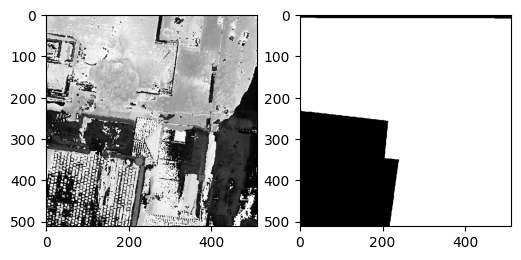

In [34]:
#Sanity check, view few images and masks
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,2,:,:], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()
# plt.savefig("E://ss.png")

In [35]:
X_train_ = np.transpose(X_train, (0, 2, 3, 1, 4))
X_test_ = np.transpose(X_test, (0, 2, 3, 1, 4))
print(X_train_.shape)
print(X_test_.shape)

(972, 512, 512, 5, 1)
(108, 512, 512, 5, 1)


In [36]:
#Unet Implementation
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import keras
from keras.utils import normalize
from tensorflow.keras.metrics import MeanIoU
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K

In [37]:
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.layers import Layer
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape, Permute
from keras.models import Model
import keras.models as models

In [38]:
from tensorflow.keras.layers import Input, Conv2D, Convolution2D, BatchNormalization, Activation, MaxPool2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Concatenate, Dropout, Lambda
from tensorflow.keras.models import Model
from keras.layers import Activation, MaxPool2D, Concatenate

In [39]:
from keras_preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from keras.layers import Layer
import argparse
import json
from keras.models import Sequential

In [40]:
K.set_image_data_format("channels_last")

In [41]:
def segnet(input_shape, n_labels, kernel=3, output_mode="sigmoid"):
    # encoder
    inputs = Input(shape=input_shape)

    conv_1 = Convolution2D(32, (kernel, kernel), padding="same")(inputs)
    conv_1 = BatchNormalization()(conv_1)
    conv_1 = Activation("relu")(conv_1)
    
    pool_1 = MaxPooling2D(data_format="channels_last", pool_size=(2, 2))(conv_1)
    
    conv_2 = Convolution2D(64, (kernel, kernel), padding="same")(pool_1)
    conv_2 = BatchNormalization()(conv_2)
    conv_2 = Activation("relu")(conv_2)
    
    pool_2 = MaxPooling2D(data_format="channels_last", pool_size=(2, 2))(conv_2)
    
    conv_3 = Convolution2D(128, (kernel, kernel), padding="same")(pool_2)
    conv_3 = BatchNormalization()(conv_3)
    conv_3 = Activation("relu")(conv_3)
    
    pool_3 = MaxPooling2D(data_format="channels_last", pool_size=(2, 2))(conv_3)
    
    conv_4 = Convolution2D(256, (kernel, kernel), padding="same")(pool_3)
    conv_4 = BatchNormalization()(conv_4)
    conv_4 = Activation("relu")(conv_4)
    
    pool_4 = MaxPooling2D(data_format="channels_last", pool_size=(2, 2))(conv_4)
    print("Build enceder done..")
    
    # decoder

    unpool_1 = UpSampling2D(size=2)(pool_4)

    deconv_1 = Convolution2D(256, (kernel, kernel), padding="same")(unpool_1)
    deconv_1 = BatchNormalization()(deconv_1)
    deconv_1 = Activation("relu")(deconv_1)
    
    unpool_2 = UpSampling2D(size=2)(deconv_1)

    deconv_2 = Convolution2D(128, (kernel, kernel), padding="same")(unpool_2)
    deconv_2 = BatchNormalization()(deconv_2)
    deconv_2 = Activation("relu")(deconv_2)
    
    unpool_3 = UpSampling2D(size=2)(deconv_2)

    deconv_3 = Convolution2D(64, (kernel, kernel), padding="same")(unpool_3)
    deconv_3 = BatchNormalization()(deconv_3)
    deconv_3 = Activation("relu")(deconv_3)
    
    unpool_4 = UpSampling2D(size=2)(deconv_3)

    deconv_4 = Convolution2D(32, (kernel, kernel), padding="same")(unpool_4)
    deconv_4 = BatchNormalization()(deconv_4)
    deconv_4 = Activation("relu")(deconv_4)

    deconv_5 = Convolution2D(n_labels, (1, 1), padding="valid")(deconv_4)
    deconv_5 = BatchNormalization()(deconv_5)
    # conv_26 = Reshape(
    #     (input_shape[0] * input_shape[1], n_labels),
    #     input_shape=(input_shape[0], input_shape[1], n_labels),
    # )(conv_26)

    outputs = Activation(output_mode)(deconv_5)
    print("Build decoder done..")

    model = Model(inputs=inputs, outputs=outputs, name="Seg--Net")

    return model

In [42]:
model = segnet((512,512,5), n_labels=1 ,kernel=3, output_mode="sigmoid")
print(model.summary())

2022-12-27 06:17:23.676061: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Build enceder done..
Build decoder done..
Model: "Seg--Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 5)]     0         
                                                                 
 conv2d (Conv2D)             (None, 512, 512, 32)      1472      
                                                                 
 batch_normalization (BatchN  (None, 512, 512, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512, 512, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2

In [ ]:
# def model(img_width=512, img_height=512, img_channels=5, classes=1):
#     """define a basic segnet model."""
#     model = Sequential()

#     # encoder
#     model.add(ZeroPadding2D(padding=0, input_shape=(img_channels, img_height, img_width)))
#     model.add(Conv2D(filters=16, kernel_size=3, padding="valid"))
#     model.add(BatchNormalization())
#     model.add(Activation("relu"))        
#     model.add(ZeroPadding2D(padding=1))   #512,512,64
    
#     model.add(MaxPooling2D(pool_size=2))  #256,256,64

#     model.add(ZeroPadding2D(padding=1))
#     model.add(Conv2D(filters=32, kernel_size=3, padding="valid"))
#     model.add(BatchNormalization())
#     model.add(Activation("relu"))        #256,256,128
    
#     model.add(MaxPooling2D(pool_size=2))  #128,128,128

#     model.add(ZeroPadding2D(padding=1))
#     model.add(Conv2D(filters=64, kernel_size=3, padding="valid"))
#     model.add(BatchNormalization())
#     model.add(Activation("relu"))          #128,128,256
    
#     model.add(MaxPooling2D(pool_size=2))     #64,64,256

#     model.add(Conv2D(filters=128, kernel_size=3, padding="valid"))
#     model.add(BatchNormalization())
#     model.add(Activation("relu"))         #64,64,512
#     model.add(ZeroPadding2D(padding=1))
    
#     model.add(MaxPooling2D(pool_size=2))  #32,32,512

#     # decoder
#     model.add(UpSampling2D(size=2))         #64,64,512  
#     model.add(ZeroPadding2D(padding=0))
#     model.add(Conv2D(filters=128, kernel_size=3, padding="valid"))
#     model.add(BatchNormalization())         #64,64,512 

#     model.add(ZeroPadding2D(padding=1))
#     model.add(UpSampling2D(size=2))         #128,128,512
#     model.add(ZeroPadding2D(padding=0))
#     model.add(Conv2D(filters=64, kernel_size=3, padding="valid"))
#     model.add(BatchNormalization())         #128,128,256  

#     model.add(ZeroPadding2D(padding=1))
#     model.add(UpSampling2D(size=2))         #256,256,256
#     model.add(Conv2D(filters=32, kernel_size=3, padding="valid"))
#     model.add(BatchNormalization())         #256,256,128
#     model.add(ZeroPadding2D(padding=1))
    
#     model.add(UpSampling2D(size=2))         #512,512,128
#     model.add(Conv2D(filters=16, kernel_size=3, padding="valid"))
#     model.add(BatchNormalization())         #512,512,64

#     # output layer
#     model.add(Conv2D(filters=classes, kernel_size=1, padding="valid"))
#     # model.add(Reshape((classes, img_width*img_height), input_shape=(classes, img_height, img_width)))
#     # model.add(Permute((2, 1)))
#     model.add(ZeroPadding2D(padding=1))
#     model.add(Activation("sigmoid"))

#     return model

In [52]:
# model = model(img_width=512, img_height=512, img_channels=5, classes=1)
# print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_15 (ZeroPadd  (None, 5, 512, 512)      0         
 ing2D)                                                          
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 510, 510)      736       
                                                                 
 batch_normalization_11 (Bat  (None, 16, 510, 510)     2040      
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 16, 510, 510)      0         
                                                                 
 zero_padding2d_16 (ZeroPadd  (None, 16, 512, 512)     0         
 ing2D)                                                          
                                                      

In [ ]:
# class MaxPoolingWithArgmax2D(Layer):

#     def __init__(
#             self,
#             pool_size=(2, 2),
#             strides=(2, 2),
#             padding='same',
#             **kwargs):
#         super(MaxPoolingWithArgmax2D, self).__init__(**kwargs)
#         self.padding = padding
#         self.pool_size = pool_size
#         self.strides = strides
    
#     def call(self, inputs, **kwargs):
#         padding = self.padding
#         pool_size = self.pool_size
#         strides = self.strides
#         ksize = [1, pool_size[0], pool_size[1], 1]
#         padding = padding.upper()
#         strides = [1, strides[0], strides[1], 1]
#         output, argmax = tf.nn.max_pool_with_argmax(
#             inputs,
#             ksize=ksize,
#             strides=strides,
#             padding=padding)

#         argmax = K.cast(argmax, K.floatx())
#         return [output, argmax]
       
#     def get_config(self):
#         config = super().get_config().copy()
#         config.update({
#             "padding": self.padding,
#             "pool_size": self.pool_size,
#             "strides": self.strides
#         })
#         return config
    
#     def compute_output_shape(self, input_shape):
#         ratio = (1, 2, 2, 1)
#         output_shape = [
#             dim // ratio[idx]
#             if dim is not None else None
#             for idx, dim in enumerate(input_shape)]
#         output_shape = tuple(output_shape)
#         return [output_shape, output_shape]

#     def compute_mask(self, inputs, mask=None):
#         return 2 * [None]
    
# class MaxUnpooling2D(Layer):
#     def __init__(self, size=(2, 2), **kwargs):
#         super(MaxUnpooling2D, self).__init__(**kwargs)
#         self.size = size

#     def call(self, inputs, output_shape=None):
#         updates, mask = inputs[0], inputs[1]
#         with tf.compat.v1.variable_scope(self.name):
#             mask = K.cast(mask, 'int32')
#             input_shape = tf.shape(updates, out_type='int32')

#             if output_shape is None:
#                 output_shape = (
#                     input_shape[0],
#                     input_shape[1] * self.size[0],
#                     input_shape[2] * self.size[1],
#                     input_shape[3])

#             ret = tf.scatter_nd(K.expand_dims(K.flatten(mask)),
#                                   K.flatten(updates),
#                                   [K.prod(output_shape)])

#             input_shape = updates.shape
#             out_shape = [-1,
#                          input_shape[1] * self.size[0],
#                          input_shape[2] * self.size[1],
#                          input_shape[3]]
#         return K.reshape(ret, out_shape)
    
#     def get_config(self):
#         config = super().get_config().copy()
#         config.update({
#             'size': self.size
#         })
#         return config

#     def compute_output_shape(self, input_shape):
#         mask_shape = input_shape[1]
#         return (
#                 mask_shape[0],
#                 mask_shape[1]*self.size[0],
#                 mask_shape[2]*self.size[1],
#                 mask_shape[3]
#                 )

In [ ]:
#def segnet(input_shape, n_labels, kernel=3, pool_size=(2, 2), output_mode="sigmoid"):
#     # encoder
#     inputs = Input(shape=input_shape)

#     conv_1 = Convolution2D(16, (kernel, kernel), padding="same")(inputs)
#     conv_1 = BatchNormalization()(conv_1)
#     conv_1 = Activation("relu")(conv_1)
#     conv_2 = Convolution2D(16, (kernel, kernel), padding="same")(conv_1)
#     conv_2 = BatchNormalization()(conv_2)
#     conv_2 = Activation("relu")(conv_2)
    
#     pool_1, mask_1 = MaxPoolingWithArgmax2D(pool_size)(conv_2)

#     conv_3 = Convolution2D(32, (kernel, kernel), padding="same")(pool_1)
#     conv_3 = BatchNormalization()(conv_3)
#     conv_3 = Activation("relu")(conv_3)
#     conv_4 = Convolution2D(32, (kernel, kernel), padding="same")(conv_3)
#     conv_4 = BatchNormalization()(conv_4)
#     conv_4 = Activation("relu")(conv_4)

#     pool_2, mask_2 = MaxPoolingWithArgmax2D(pool_size)(conv_4)

#     conv_5 = Convolution2D(64, (kernel, kernel), padding="same")(pool_2)
#     conv_5 = BatchNormalization()(conv_5)
#     conv_5 = Activation("relu")(conv_5)
#     conv_6 = Convolution2D(64, (kernel, kernel), padding="same")(conv_5)
#     conv_6 = BatchNormalization()(conv_6)
#     conv_6 = Activation("relu")(conv_6)

#     pool_3, mask_3 = MaxPoolingWithArgmax2D(pool_size)(conv_6)

#     conv_8 = Convolution2D(128, (kernel, kernel), padding="same")(pool_3)
#     conv_8 = BatchNormalization()(conv_8)
#     conv_8 = Activation("relu")(conv_8)
    
#     pool_4, mask_4 = MaxPoolingWithArgmax2D(pool_size)(conv_8)

#     conv_11 = Convolution2D(128, (kernel, kernel), padding="same")(pool_4)
#     conv_11 = BatchNormalization()(conv_11)
#     conv_11 = Activation("relu")(conv_11)

#     pool_5, mask_5 = MaxPoolingWithArgmax2D(pool_size)(conv_11)
#     print("Build enceder done..")
    
#     # decoder

#     unpool_1 = MaxUnpooling2D(pool_size)([pool_5, mask_5])

#     conv_14 = Convolution2D(128, (kernel, kernel), padding="same")(unpool_1)
#     conv_14 = BatchNormalization()(conv_14)
#     conv_14 = Activation("relu")(conv_14)
    

#     unpool_2 = MaxUnpooling2D(pool_size)([conv_14, mask_4])

#     conv_17 = Convolution2D(128, (kernel, kernel), padding="same")(unpool_2)
#     conv_17 = BatchNormalization()(conv_17)
#     conv_17 = Activation("relu")(conv_17)
#     conv_19 = Convolution2D(64, (kernel, kernel), padding="same")(conv_17)
#     conv_19 = BatchNormalization()(conv_19)
#     conv_19 = Activation("relu")(conv_19)

#     unpool_3 = MaxUnpooling2D(pool_size)([conv_19, mask_3])

#     conv_20 = Convolution2D(64, (kernel, kernel), padding="same")(unpool_3)
#     conv_20 = BatchNormalization()(conv_20)
#     conv_20 = Activation("relu")(conv_20)
#     conv_21 = Convolution2D(32, (kernel, kernel), padding="same")(conv_20)
#     conv_21 = BatchNormalization()(conv_21)
#     conv_21 = Activation("relu")(conv_21)
   
#     unpool_4 = MaxUnpooling2D(pool_size)([conv_21, mask_2])

#     conv_23 = Convolution2D(32, (kernel, kernel), padding="same")(unpool_4)
#     conv_23 = BatchNormalization()(conv_23)
#     conv_23 = Activation("relu")(conv_23)
#     conv_24 = Convolution2D(16, (kernel, kernel), padding="same")(conv_23)
#     conv_24 = BatchNormalization()(conv_24)
#     conv_24 = Activation("relu")(conv_24)

#     unpool_5 = MaxUnpooling2D(pool_size)([conv_24, mask_1])

#     conv_25 = Convolution2D(16, (kernel, kernel), padding="same")(unpool_5)
#     conv_25 = BatchNormalization()(conv_25)
#     conv_25 = Activation("relu")(conv_25)

#     conv_26 = Convolution2D(n_labels, (1, 1), padding="valid")(conv_25)
#     conv_26 = BatchNormalization()(conv_26)
#     # conv_26 = Reshape(
#     #     (input_shape[0] * input_shape[1], n_labels),
#     #     input_shape=(input_shape[0], input_shape[1], n_labels),
#     # )(conv_26)

#     outputs = Activation(output_mode)(conv_26)
#     print("Build decoder done..")

#     model = Model(inputs=inputs, outputs=outputs, name="SegNet")

#     return model

# model = segnet((512,512,5), n_labels=1 ,kernel=3, pool_size=(2,2), output_mode="sigmoid")

# print(model.summary())

In [46]:
#"""17 lakhs parameters SegNet model"""
# def segnet(input_shape, n_labels, kernel=3, pool_size=(2, 2), output_mode="sigmoid"):
#     # encoder
#     inputs = Input(shape=input_shape)

#     conv_1 = Convolution2D(16, (kernel, kernel), padding="same")(inputs)
#     conv_1 = BatchNormalization()(conv_1)
#     conv_1 = Activation("relu")(conv_1)
#     conv_2 = Convolution2D(32, (kernel, kernel), padding="same")(conv_1)
#     conv_2 = BatchNormalization()(conv_2)
#     conv_2 = Activation("relu")(conv_2)
    
#     pool_1, mask_1 = MaxPoolingWithArgmax2D(pool_size)(conv_2)

#     conv_3 = Convolution2D(32, (kernel, kernel), padding="same")(pool_1)
#     conv_3 = BatchNormalization()(conv_3)
#     conv_3 = Activation("relu")(conv_3)
#     conv_4 = Convolution2D(64, (kernel, kernel), padding="same")(conv_3)
#     conv_4 = BatchNormalization()(conv_4)
#     conv_4 = Activation("relu")(conv_4)

#     pool_2, mask_2 = MaxPoolingWithArgmax2D(pool_size)(conv_4)

#     conv_5 = Convolution2D(64, (kernel, kernel), padding="same")(pool_2)
#     conv_5 = BatchNormalization()(conv_5)
#     conv_5 = Activation("relu")(conv_5)
#     conv_6 = Convolution2D(128, (kernel, kernel), padding="same")(conv_5)
#     conv_6 = BatchNormalization()(conv_6)
#     conv_6 = Activation("relu")(conv_6)

#     pool_3, mask_3 = MaxPoolingWithArgmax2D(pool_size)(conv_6)

#     conv_8 = Convolution2D(128, (kernel, kernel), padding="same")(pool_3)
#     conv_8 = BatchNormalization()(conv_8)
#     conv_8 = Activation("relu")(conv_8)
    
#     pool_4, mask_4 = MaxPoolingWithArgmax2D(pool_size)(conv_8)

#     conv_11 = Convolution2D(256, (kernel, kernel), padding="same")(pool_4)
#     conv_11 = BatchNormalization()(conv_11)
#     conv_11 = Activation("relu")(conv_11)
   

#     pool_5, mask_5 = MaxPoolingWithArgmax2D(pool_size)(conv_11)
#     print("Build enceder done..")
    
#     # decoder

#     unpool_1 = MaxUnpooling2D(pool_size)([pool_5, mask_5])

#     conv_14 = Convolution2D(256, (kernel, kernel), padding="same")(unpool_1)
#     conv_14 = BatchNormalization()(conv_14)
#     conv_14 = Activation("relu")(conv_14)
    

#     unpool_2 = MaxUnpooling2D(pool_size)([conv_14, mask_4])

#     conv_17 = Convolution2D(128, (kernel, kernel), padding="same")(unpool_2)
#     conv_17 = BatchNormalization()(conv_17)
#     conv_17 = Activation("relu")(conv_17)
#     conv_19 = Convolution2D(128, (kernel, kernel), padding="same")(conv_17)
#     conv_19 = BatchNormalization()(conv_19)
#     conv_19 = Activation("relu")(conv_19)

#     unpool_3 = MaxUnpooling2D(pool_size)([conv_19, mask_3])

#     conv_20 = Convolution2D(64, (kernel, kernel), padding="same")(unpool_3)
#     conv_20 = BatchNormalization()(conv_20)
#     conv_20 = Activation("relu")(conv_20)
#     conv_21 = Convolution2D(64, (kernel, kernel), padding="same")(conv_20)
#     conv_21 = BatchNormalization()(conv_21)
#     conv_21 = Activation("relu")(conv_21)
   
#     unpool_4 = MaxUnpooling2D(pool_size)([conv_21, mask_2])

#     conv_23 = Convolution2D(32, (kernel, kernel), padding="same")(unpool_4)
#     conv_23 = BatchNormalization()(conv_23)
#     conv_23 = Activation("relu")(conv_23)
#     conv_24 = Convolution2D(32, (kernel, kernel), padding="same")(conv_23)
#     conv_24 = BatchNormalization()(conv_24)
#     conv_24 = Activation("relu")(conv_24)

#     unpool_5 = MaxUnpooling2D(pool_size)([conv_24, mask_1])

#     conv_25 = Convolution2D(16, (kernel, kernel), padding="same")(unpool_5)
#     conv_25 = BatchNormalization()(conv_25)
#     conv_25 = Activation("relu")(conv_25)

#     conv_26 = Convolution2D(n_labels, (1, 1), padding="valid")(conv_25)
#     conv_26 = BatchNormalization()(conv_26)
#     # conv_26 = Reshape(
#     #     (input_shape[0] * input_shape[1], n_labels),
#     #     input_shape=(input_shape[0], input_shape[1], n_labels),
#     # )(conv_26)

#     outputs = Activation(output_mode)(conv_26)
#     print("Build decoder done..")

#     model = Model(inputs=inputs, outputs=outputs, name="SegNet")

#     return model

# model = segnet((512,512,5), n_labels=1 ,kernel=3, pool_size=(2,2), output_mode="sigmoid")

# print(model.summary())

In [ ]:
# 1.1 Cr parameters SegNet model
# def segnet(input_shape, n_labels, kernel=3, pool_size=(2, 2), output_mode="sigmoid"):
#     # encoder
#     inputs = Input(shape=input_shape)

#     conv_1 = Convolution2D(64, (kernel, kernel), padding="same")(inputs)
#     conv_1 = BatchNormalization()(conv_1)
#     conv_1 = Activation("relu")(conv_1)
#     conv_2 = Convolution2D(64, (kernel, kernel), padding="same")(conv_1)
#     conv_2 = BatchNormalization()(conv_2)
#     conv_2 = Activation("relu")(conv_2)
    
#     pool_1, mask_1 = MaxPoolingWithArgmax2D(pool_size)(conv_2)

#     conv_3 = Convolution2D(128, (kernel, kernel), padding="same")(pool_1)
#     conv_3 = BatchNormalization()(conv_3)
#     conv_3 = Activation("relu")(conv_3)
#     conv_4 = Convolution2D(128, (kernel, kernel), padding="same")(conv_3)
#     conv_4 = BatchNormalization()(conv_4)
#     conv_4 = Activation("relu")(conv_4)

#     pool_2, mask_2 = MaxPoolingWithArgmax2D(pool_size)(conv_4)

#     conv_5 = Convolution2D(256, (kernel, kernel), padding="same")(pool_2)
#     conv_5 = BatchNormalization()(conv_5)
#     conv_5 = Activation("relu")(conv_5)
#     conv_6 = Convolution2D(256, (kernel, kernel), padding="same")(conv_5)
#     conv_6 = BatchNormalization()(conv_6)
#     conv_6 = Activation("relu")(conv_6)


#     pool_3, mask_3 = MaxPoolingWithArgmax2D(pool_size)(conv_6)

#     conv_8 = Convolution2D(512, (kernel, kernel), padding="same")(pool_3)
#     conv_8 = BatchNormalization()(conv_8)
#     conv_8 = Activation("relu")(conv_8)
    
    
#     pool_4, mask_4 = MaxPoolingWithArgmax2D(pool_size)(conv_8)

#     conv_11 = Convolution2D(512, (kernel, kernel), padding="same")(pool_4)
#     conv_11 = BatchNormalization()(conv_11)
#     conv_11 = Activation("relu")(conv_11)
   

#     pool_5, mask_5 = MaxPoolingWithArgmax2D(pool_size)(conv_11)
#     print("Build enceder done..")
    
#     # decoder

#     unpool_1 = MaxUnpooling2D(pool_size)([pool_5, mask_5])

#     conv_14 = Convolution2D(512, (kernel, kernel), padding="same")(unpool_1)
#     conv_14 = BatchNormalization()(conv_14)
#     conv_14 = Activation("relu")(conv_14)
    

#     unpool_2 = MaxUnpooling2D(pool_size)([conv_14, mask_4])

#     conv_17 = Convolution2D(512, (kernel, kernel), padding="same")(unpool_2)
#     conv_17 = BatchNormalization()(conv_17)
#     conv_17 = Activation("relu")(conv_17)
#     conv_19 = Convolution2D(256, (kernel, kernel), padding="same")(conv_17)
#     conv_19 = BatchNormalization()(conv_19)
#     conv_19 = Activation("relu")(conv_19)

#     unpool_3 = MaxUnpooling2D(pool_size)([conv_19, mask_3])

#     conv_20 = Convolution2D(256, (kernel, kernel), padding="same")(unpool_3)
#     conv_20 = BatchNormalization()(conv_20)
#     conv_20 = Activation("relu")(conv_20)
#     conv_21 = Convolution2D(128, (kernel, kernel), padding="same")(conv_20)
#     conv_21 = BatchNormalization()(conv_21)
#     conv_21 = Activation("relu")(conv_21)
   
#     unpool_4 = MaxUnpooling2D(pool_size)([conv_21, mask_2])

#     conv_23 = Convolution2D(128, (kernel, kernel), padding="same")(unpool_4)
#     conv_23 = BatchNormalization()(conv_23)
#     conv_23 = Activation("relu")(conv_23)
#     conv_24 = Convolution2D(64, (kernel, kernel), padding="same")(conv_23)
#     conv_24 = BatchNormalization()(conv_24)
#     conv_24 = Activation("relu")(conv_24)

#     unpool_5 = MaxUnpooling2D(pool_size)([conv_24, mask_1])

#     conv_25 = Convolution2D(64, (kernel, kernel), padding="same")(unpool_5)
#     conv_25 = BatchNormalization()(conv_25)
#     conv_25 = Activation("relu")(conv_25)

#     conv_26 = Convolution2D(n_labels, (1, 1), padding="valid")(conv_25)
#     conv_26 = BatchNormalization()(conv_26)
#     # conv_26 = Reshape(
#     #     (input_shape[0] * input_shape[1], n_labels),
#     #     input_shape=(input_shape[0], input_shape[1], n_labels),
#     # )(conv_26)

#     outputs = Activation(output_mode)(conv_26)
#     print("Build decoder done..")

#     model = Model(inputs=inputs, outputs=outputs, name="SegNet")

#     return model

# model = segnet((512,512,5), n_labels=1 ,kernel=3, pool_size=(2,2), output_mode="sigmoid")

# print(model.summary())

In [41]:
# def segnet(input_shape, n_labels, kernel=3, pool_size=(2, 2), output_mode="sigmoid"):
#     # encoder
#     inputs = Input(shape=input_shape)

#     conv_1 = Convolution2D(32, (kernel, kernel), padding="same")(inputs)
#     conv_1 = BatchNormalization()(conv_1)
#     conv_1 = Activation("relu")(conv_1)
#     conv_2 = Convolution2D(32, (kernel, kernel), padding="same")(conv_1)
#     conv_2 = BatchNormalization()(conv_2)
#     conv_2 = Activation("relu")(conv_2)
    
#     pool_1, mask_1 = MaxPoolingWithArgmax2D(pool_size)(conv_2)

#     conv_3 = Convolution2D(64, (kernel, kernel), padding="same")(pool_1)
#     conv_3 = BatchNormalization()(conv_3)
#     conv_3 = Activation("relu")(conv_3)
#     conv_4 = Convolution2D(64, (kernel, kernel), padding="same")(conv_3)
#     conv_4 = BatchNormalization()(conv_4)
#     conv_4 = Activation("relu")(conv_4)

#     pool_2, mask_2 = MaxPoolingWithArgmax2D(pool_size)(conv_4)

#     conv_5 = Convolution2D(128, (kernel, kernel), padding="same")(pool_2)
#     conv_5 = BatchNormalization()(conv_5)
#     conv_5 = Activation("relu")(conv_5)
#     conv_6 = Convolution2D(128, (kernel, kernel), padding="same")(conv_5)
#     conv_6 = BatchNormalization()(conv_6)
#     conv_6 = Activation("relu")(conv_6)

#     pool_3, mask_3 = MaxPoolingWithArgmax2D(pool_size)(conv_6)

#     conv_8 = Convolution2D(256, (kernel, kernel), padding="same")(pool_3)
#     conv_8 = BatchNormalization()(conv_8)
#     conv_8 = Activation("relu")(conv_8)
    
#     pool_4, mask_4 = MaxPoolingWithArgmax2D(pool_size)(conv_8)

#     conv_11 = Convolution2D(256, (kernel, kernel), padding="same")(pool_4)
#     conv_11 = BatchNormalization()(conv_11)
#     conv_11 = Activation("relu")(conv_11)
   

#     pool_5, mask_5 = MaxPoolingWithArgmax2D(pool_size)(conv_11)
#     print("Build enceder done..")
    
#     # decoder

#     unpool_1 = MaxUnpooling2D(pool_size)([pool_5, mask_5])

#     conv_14 = Convolution2D(256, (kernel, kernel), padding="same")(unpool_1)
#     conv_14 = BatchNormalization()(conv_14)
#     conv_14 = Activation("relu")(conv_14)
    

#     unpool_2 = MaxUnpooling2D(pool_size)([conv_14, mask_4])

#     conv_17 = Convolution2D(256, (kernel, kernel), padding="same")(unpool_2)
#     conv_17 = BatchNormalization()(conv_17)
#     conv_17 = Activation("relu")(conv_17)
#     conv_19 = Convolution2D(128, (kernel, kernel), padding="same")(conv_17)
#     conv_19 = BatchNormalization()(conv_19)
#     conv_19 = Activation("relu")(conv_19)

#     unpool_3 = MaxUnpooling2D(pool_size)([conv_19, mask_3])

#     conv_20 = Convolution2D(128, (kernel, kernel), padding="same")(unpool_3)
#     conv_20 = BatchNormalization()(conv_20)
#     conv_20 = Activation("relu")(conv_20)
#     conv_21 = Convolution2D(64, (kernel, kernel), padding="same")(conv_20)
#     conv_21 = BatchNormalization()(conv_21)
#     conv_21 = Activation("relu")(conv_21)
   
#     unpool_4 = MaxUnpooling2D(pool_size)([conv_21, mask_2])

#     conv_23 = Convolution2D(64, (kernel, kernel), padding="same")(unpool_4)
#     conv_23 = BatchNormalization()(conv_23)
#     conv_23 = Activation("relu")(conv_23)
#     conv_24 = Convolution2D(32, (kernel, kernel), padding="same")(conv_23)
#     conv_24 = BatchNormalization()(conv_24)
#     conv_24 = Activation("relu")(conv_24)

#     unpool_5 = MaxUnpooling2D(pool_size)([conv_24, mask_1])

#     conv_25 = Convolution2D(32, (kernel, kernel), padding="same")(unpool_5)
#     conv_25 = BatchNormalization()(conv_25)
#     conv_25 = Activation("relu")(conv_25)

#     conv_26 = Convolution2D(n_labels, (1, 1), padding="valid")(conv_25)
#     conv_26 = BatchNormalization()(conv_26)
#     # conv_26 = Reshape(
#     #     (input_shape[0] * input_shape[1], n_labels),
#     #     input_shape=(input_shape[0], input_shape[1], n_labels),
#     # )(conv_26)

#     outputs = Activation(output_mode)(conv_26)
#     print("Build decoder done..")

#     model = Model(inputs=inputs, outputs=outputs, name="SegNet")

#     return model

# model = segnet((512,512,5), n_labels=1 ,kernel=3, pool_size=(2,2), output_mode="sigmoid")

# print(model.summary())

2022-12-16 12:16:29.247133: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Build enceder done..
Build decoder done..
Model: "SegNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 5  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  1472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 32  128        ['conv2d[0][0]']                 
 alization)                     )                  

In [150]:
from keras.utils import plot_model

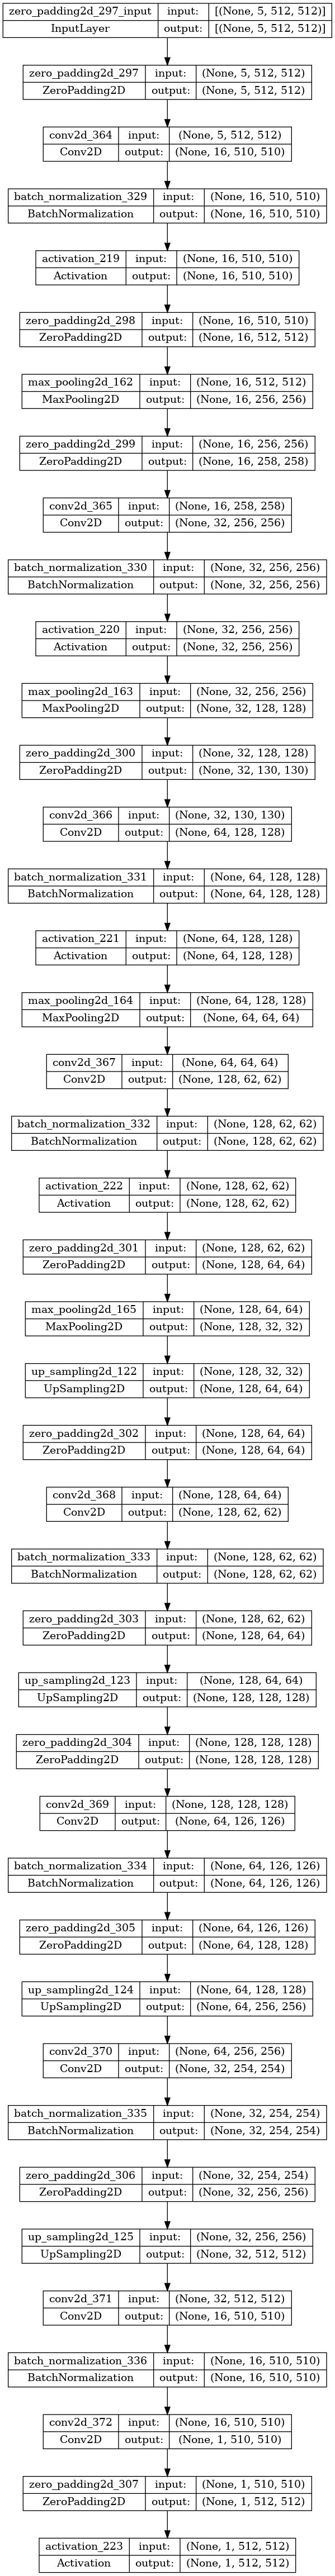

In [151]:
keras.utils.plot_model(model, show_shapes=True)

In [96]:
# from keras_lr_finder import LRFinder
# import matplotlib.pyplot as plt
# import keras.backend as K
# from keras.callbacks import Callback
# from keras.callbacks import LambdaCallback
# import math

In [ ]:
"""Method 1 - Finding optimal learning rate for MSE loss function"""

In [47]:
# class LRFinder:
#     """
#     Learning rate range test detailed in Cyclical Learning Rates for Training
#     Neural Networks by Leslie N. Smith. The learning rate range test is a test
#     that provides valuable information about the optimal learning rate. During
#     a pre-training run, the learning rate is increased linearly or
#     exponentially between two boundaries. The low initial learning rate allows
#     the network to start converging and as the learning rate is increased it
#     will eventually be too large and the network will diverge.
#     """

#     def __init__(self, model):
#         self.model = model
#         self.losses = []
#         self.learning_rates = []
#         self.best_loss = 1e9

#     def on_batch_end(self, batch, logs):
#         lr = K.get_value(self.model.optimizer.lr)
#         self.learning_rates.append(lr)

#         loss = logs['loss']
#         self.losses.append(loss)

#         if batch > 5 and (math.isnan(loss) or loss > self.best_loss * 4):
#             self.model.stop_training = True
#             return

#         if loss < self.best_loss:
#             self.best_loss = loss

#         lr *= self.lr_mult
#         K.set_value(self.model.optimizer.lr, lr)

#     def find(self, dataset, start_lr, end_lr, epochs=1,
#              steps_per_epoch=None, **kw_fit):
#         if steps_per_epoch is None:
#             raise Exception('To correctly train on the datagenerator,'
#                             '`steps_per_epoch` cannot be None.'
#                             'You can calculate it as '
#                             '`np.ceil(len(TRAINING_LIST) / BATCH)`')

#         self.lr_mult = (float(end_lr) /
#                         float(start_lr)) ** (float(1) /
#                                              float(epochs * steps_per_epoch))
#         initial_weights = self.model.get_weights()

#         original_lr = K.get_value(self.model.optimizer.lr)
#         K.set_value(self.model.optimizer.lr, start_lr)

#         callback = LambdaCallback(on_batch_end=lambda batch,
#                                   logs: self.on_batch_end(batch, logs))

#         self.model.fit(dataset,
#                        epochs=epochs, callbacks=[callback], **kw_fit)
#         self.model.set_weights(initial_weights)

#         K.set_value(self.model.optimizer.lr, original_lr)

#     def get_learning_rates(self):
#         return(self.learning_rates)

#     def get_losses(self):
#         return(self.losses)

#     def get_derivatives(self, sma):
#         assert sma >= 1
#         derivatives = [0] * sma
#         for i in range(sma, len(self.learning_rates)):
#             derivatives.append((self.losses[i] - self.losses[i - sma]) / sma)
#         return derivatives

#     def get_best_lr(self, sma, n_skip_beginning=10, n_skip_end=5):
#         derivatives = self.get_derivatives(sma)
#         best_der_idx = np.argmin(derivatives[n_skip_beginning:-n_skip_end])
#         return self.learning_rates[n_skip_beginning:-n_skip_end][best_der_idx]

In [48]:
# #defining the batch size
# BATCH = 16

In [49]:
# train_ds = tf.data.Dataset.from_tensor_slices((X_train_, y_train))
# train_ds = train_ds.shuffle(buffer_size=len(X_train_))
# train_ds = train_ds.batch(BATCH)
# train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

In [50]:
# test_ds = tf.data.Dataset.from_tensor_slices((X_test_, y_test))
# test_ds = test_ds.batch(BATCH)
# test_ds = test_ds.prefetch(tf.data.experimental.AUTOTUNE)

In [51]:
# model.compile(optimizer='sgd', loss='mse', metrics=['acc',f1_m,precision_m, recall_m, jacard_coef])

In [52]:
# STEPS_PER_EPOCH = np.ceil(len(X_train_) / BATCH)

In [53]:
# lr_finder = LRFinder(model)
# lr_finder.find(train_ds, start_lr=1e-6, end_lr=1, epochs=5,
#                steps_per_epoch=STEPS_PER_EPOCH)

Epoch 1/5
54/54 [==============================] - 1607s 30s/step - loss: 0.2620 - acc: 0.4792 - f1_m: 0.0669 - precision_m: 0.4597 - recall_m: 0.0361 - jacard_coef: 0.3301
Epoch 2/5
54/54 [==============================] - 1597s 30s/step - loss: 0.2593 - acc: 0.4904 - f1_m: 0.0861 - precision_m: 0.5996 - recall_m: 0.0465 - jacard_coef: 0.3332
Epoch 3/5
54/54 [==============================] - 1359s 25s/step - loss: 0.2603 - acc: 0.4861 - f1_m: 0.0779 - precision_m: 0.5448 - recall_m: 0.0420 - jacard_coef: 0.3324
Epoch 4/5
54/54 [==============================] - 1298s 24s/step - loss: 0.2599 - acc: 0.4871 - f1_m: 0.0783 - precision_m: 0.5602 - recall_m: 0.0421 - jacard_coef: 0.3332
Epoch 5/5
54/54 [==============================] - 1294s 24s/step - loss: 0.2609 - acc: 0.4904 - f1_m: 0.3256 - precision_m: 0.5124 - recall_m: 0.4335 - jacard_coef: 0.3410


In [54]:
# def plot_loss(n_skip_beginning=10, n_skip_end=5, x_scale='log'):
#     """
#     Plots the loss.
#     Parameters:
#         n_skip_beginning - number of batches to skip on the left.
#         n_skip_end - number of batches to skip on the right.
#         """
#     learning_rates = lr_finder.get_learning_rates()
#     losses = lr_finder.get_losses()

#     f, ax = plt.subplots()
#     ax.set_ylabel("loss")
#     ax.set_xlabel("learning rate (log scale)")
#     ax.plot(learning_rates[n_skip_beginning:-n_skip_end],
#             losses[n_skip_beginning:-n_skip_end])
#     ax.set_xscale(x_scale)
#     return(ax)

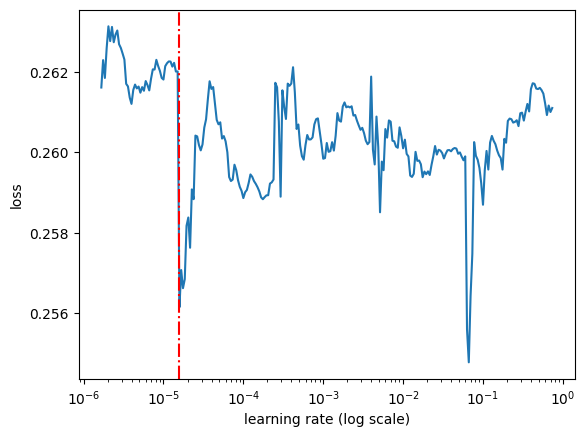

In [55]:
# axs = plot_loss()
# axs.axvline(x=lr_finder.get_best_lr(sma=20), c='r', linestyle='-.')

In [ ]:
"""Method 2 - Finding optimal learning rate for SegNet SGD BCE loss function"""

In [44]:
# class LRFind(tf.keras.callbacks.Callback): 
#     def __init__(self, min_lr, max_lr, n_rounds): 
#         self.min_lr = min_lr
#         self.max_lr = max_lr
#         self.step_up = (max_lr / min_lr) ** (1 / n_rounds)
#         self.lrs = []
#         self.losses = []
     
#     def on_train_begin(self, logs=None):
#         self.weights = self.model.get_weights()
#         self.model.optimizer.lr = self.min_lr

#     def on_train_batch_end(self, batch, logs=None):
#         self.lrs.append(self.model.optimizer.lr.numpy())
#         self.losses.append(logs["loss"])
#         self.model.optimizer.lr = self.model.optimizer.lr * self.step_up
#         if self.model.optimizer.lr > self.max_lr:
#             self.model.stop_training = True
        
#     def on_train_end(self, logs=None):
#         self.model.set_weights(self.weights)

In [45]:
# model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m, jacard_coef])

In [64]:
# EPOCHS = 1
# BATCH_SIZE = 16
# lr_finder_steps = 50
# BATCH_SIZE = 32
# lr_finder_steps = 200

50/50 [==============================] - 1468s 29s/step - loss: 0.7572 - acc: 0.4959 - f1_m: 0.6412 - precision_m: 0.5074 - recall_m: 0.9219 - jacard_coef: 0.3399


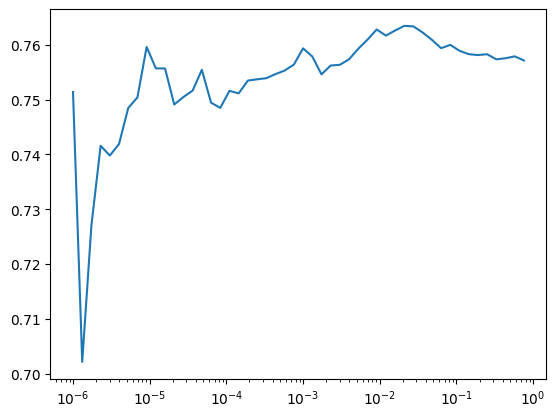

In [62]:
# lr_find = LRFind(1e-6, 1, lr_finder_steps)
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train_, y_train))\
#                     .repeat()\
#                     .shuffle(len(X_train_))\
#                     .batch(BATCH_SIZE)
# model.fit(
#     train_dataset,
#     steps_per_epoch=lr_finder_steps,
#     epochs=EPOCHS,
#     callbacks=[lr_find]
# )

# plt.plot(lr_find.lrs, lr_find.losses)
# plt.xscale('log')
# plt.show()

200/200 [==============================] - 11658s 58s/step - loss: 0.7338 - acc: 0.5145 - f1_m: 0.6547 - precision_m: 0.5167 - recall_m: 0.9458 - jacard_coef: 0.3454


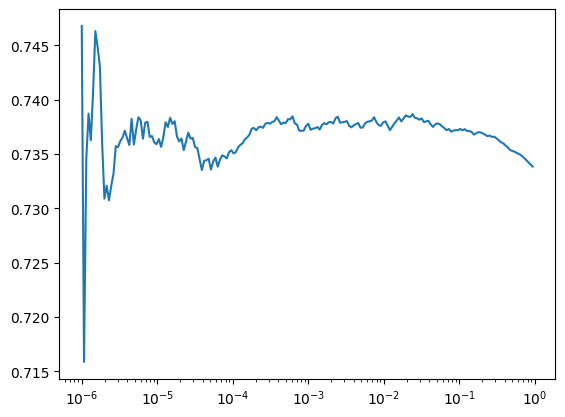

In [65]:
# lr_find = LRFind(1e-6, 1, lr_finder_steps)
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train_, y_train))\
#                     .repeat()\
#                     .shuffle(len(X_train_))\
#                     .batch(BATCH_SIZE)
# model.fit(
#     train_dataset,
#     steps_per_epoch=lr_finder_steps,
#     epochs=EPOCHS,
#     callbacks=[lr_find]
# )

# plt.plot(lr_find.lrs, lr_find.losses)
# plt.xscale('log')
# plt.show()

In [ ]:
#Fit using Callback
# lr_finder = LRFinder(min_lr=1e-6, max_lr=1)
# model.fit(X_train, y_train, batch_size=128, callbacks=[lr_finder], epochs=2)

In [ ]:
#Fit using Callback
# lr_finder = LRFinder(model)
# lr_finder.find(X_train_, y_train, start_lr=1e-6, end_lr=1, batch_size=16, epochs=5)
# lr_finder.plot_loss()

In [43]:
"# Metrics"

#f1, recall, precision metrics, and jacard coefficient

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [119]:
# #Compiling the model
# from tensorflow.keras.optimizers import SGD, Adam

In [91]:
# sgd = tf.keras.optimizers.SGD(learning_rate=0.1, decay=1e-6, momentum=0.9, nesterov=True)

In [120]:
# sgd = tf.keras.optimizers.SGD(learning_rate=0.0001)

In [50]:
# adam = tf.keras.optimizers.Adam(learning_rate = 0.5)

In [65]:
# def custom_binary_loss(y_true, y_pred): 
#     # https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/backend.py#L4826
#     y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    
#     term_0 = (1 - y_true) * K.log(1 - y_pred + K.epsilon())  # Cancels out when target is 1 
#     term_1 = y_true * K.log(y_pred + K.epsilon()) # Cancels out when target is 0

#     return -K.mean(term_0 + term_1, axis=1)

In [95]:
# def custom_loss_function(y_true, y_pred):
#     squared_difference = tf.square(y_true - y_pred)
#     return tf.reduce_mean(squared_difference, axis=-1)

In [44]:
# compile keras model with defined optimizer, loss and metrics
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m, jacard_coef])

In [45]:
# checkpoint
filepath = r'final year project thesis/trained models/SegNet_9010_13L_sgd_BCE_CP_E100.hdf5'

In [46]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
callbacks_list = [checkpoint]

In [47]:
history = model.fit(X_train_, y_train,
                    batch_size=16,
                    verbose=1,
                    epochs=100,
                    validation_data=(X_test_, y_test),
                    callbacks=callbacks_list,
                    shuffle=True)
len(history.history['val loss'])

2022-12-27 06:18:46.556741: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5096079360 exceeds 10% of free system memory.
/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
61/61 [==============================] - ETA: 0s - loss: 0.6276 - acc: 0.6550 - f1_m: 0.6633 - precision_m: 0.6703 - recall_m: 0.6639 - jacard_coef: 0.4130 
Epoch 1: val_loss improved from inf to 0.69001, saving model to final year project thesis/trained models/SegNet_9010_13L_sgd_BCE_CP_E100.hdf5
61/61 [==============================] - 1825s 30s/step - loss: 0.6276 - acc: 0.6550 - f1_m: 0.6633 - precision_m: 0.6703 - recall_m: 0.6639 - jacard_coef: 0.4130 - val_loss: 0.6900 - val_acc: 0.5192 - val_f1_m: 0.0077 - val_precision_m: 0.5900 - val_recall_m: 0.0039 - val_jacard_coef: 0.2877
Epoch 2/100
61/61 [==============================] - ETA: 0s - loss: 0.5930 - acc: 0.6931 - f1_m: 0.7169 - precision_m: 0.6859 - recall_m: 0.7577 - jacard_coef: 0.4303 
Epoch 2: val_loss improved from 0.69001 to 0.68846, saving model to final year project thesis/trained models/SegNet_9010_13L_sgd_BCE_CP_E100.hdf5
61/61 [==============================] - 2224s 37s/step - loss: 0.5930 - acc: 0.

KeyError: 'val loss'

In [ ]:
# import keras
# import numpy as np
# from tensorflow.python.ops import math_ops

# def custom_loss(y_true, y_pred):
#  diff = math_ops.squared_difference(y_pred, y_true)  #squared difference
#  loss = K.mean(diff, axis=-1) #mean over last dimension
#  loss = loss / 10.0
#  return loss

In [ ]:
# def custom_loss_function(y_true, y_pred):
#    squared_difference = tf.square(y_true - y_pred)
#    return tf.reduce_mean(squared_difference, axis=-1)

# model.compile(optimizer='adam', loss=custom_loss_function)

In [ ]:
# def custom_loss(y_true, y_pred):
    # custom_loss_value = kb.mean(kb.sum(kb.square((y_true-y_predicted)/10))) #this is divided by 10 which is additional
    # return custom_loss

In [ ]:
# def custom_binary_loss(y_true, y_pred): 
#     # https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/backend.py#L4826
#     y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    
#     term_0 = (1 - y_true) * K.log(1 - y_pred + K.epsilon())  # Cancels out when target is 1 
#     term_1 = y_true * K.log(y_pred + K.epsilon()) # Cancels out when target is 0

#     return -K.mean(term_0 + term_1, axis=1)

In [ ]:
# def get_custom_bce(epsilon = 1e-2):
#   def custom_bce(y_true, y_pred):
#     return -tf.math.reduce_mean(y_true * tf.math.log(tf.math.maximum(y_pred, tf.constant(epsilon))) + (1. - y_true) * tf.math.log(tf.math.maximum(1. - y_pred, tf.constant(epsilon))))
# return custom_bce

In [ ]:
# def my_custom_loss(y_true,y_pred):
#     t_loss = (-1)*(y_true * K.log(y_pred) + (1 - y_true) * K.log(1 - y_pred))
#     return K.mean(t_loss)

 # t_loss = K.max(y_pred,0)-y_pred * y_true + K.log(1+K.exp((-1)*K.abs(y_pred)))

In [ ]:
# reset keras seed
# use_session_with_seed(345)

# # Custom Loss Function (cross entropy)
# loss <- function(y_true,y_pred){
#  k_sum(-((y_true*k_log(y_pred))+(1-y_true)*k_log(1-y_pred)))
# }

# # defining a keras sequential model
# modelCust <- keras_model_sequential()

# # model architecture
# modelCust %>% 
#   layer_dense(units = 20, input_shape = ncol(train_x)) %>% 
#   layer_dropout(rate=0.25)%>%
#   layer_activation(activation = 'relu') %>% 
#   layer_dense(units = 1) %>%
#   layer_activation(activation = 'sigmoid')

# # compiling the defined model with metric = accuracy and optimiser as adam.
# modelCust %>% compile(
#   loss = loss,
#   optimizer = 'adam',
#   metrics = c('binary_accuracy',f1)
# )

# # fitting the model on the training dataset
# modelCust %>% fit(train_x, train_y, 
#                   epochs = 1000, 
#                   batch_size = nrow(train_x),
#                   shuffle = FALSE)

# # score and produce predictions
# scoreCust <- modelCust %>% evaluate(test_x, test_y)
# predCust <- modelCust %>% predict(test_x)

In [ ]:
# import tensorflow as tf
# from keras import backend as K


# """ Weighted binary crossentropy between an output tensor and a target tensor.
# # Arguments
#     pos_weight: A coefficient to use on the positive examples.
# # Returns
#     A loss function supposed to be used in model.compile().
# """
# def weighted_binary_crossentropy(pos_weight=1):
#     def _to_tensor(x, dtype):
#         """Convert the input `x` to a tensor of type `dtype`.
#         # Arguments
#             x: An object to be converted (numpy array, list, tensors).
#             dtype: The destination type.
#         # Returns
#             A tensor.
#         """
#     return tf.convert_to_tensor(x, dtype=dtype)
  
  
#     def _calculate_weighted_binary_crossentropy(target, output, from_logits=False):
#         """Calculate weighted binary crossentropy between an output tensor and a target tensor.
#         # Arguments
#             target: A tensor with the same shape as `output`.
#             output: A tensor.
#             from_logits: Whether `output` is expected to be a logits tensor.
#                 By default, we consider that `output`
#                 encodes a probability distribution.
#         # Returns
#             A tensor.
#         """
#         # Note: tf.nn.sigmoid_cross_entropy_with_logits
#         # expects logits, Keras expects probabilities.
#         if not from_logits:
#             # transform back to logits
#             _epsilon = _to_tensor(K.common.epsilon(), output.dtype.base_dtype)
#             output = tf.clip_by_value(output, _epsilon, 1 - _epsilon)
#             output = tf.log(output / (1 - output))
#         return tf.nn.weighted_cross_entropy_with_logits(targets=target, logits=output, pos_weight=pos_weight)


#     def _weighted_binary_crossentropy(y_true, y_pred):
#         return K.mean(_calculate_weighted_binary_crossentropy(y_true, y_pred), axis=-1)
    
#     return _weighted_binary_crossentropy

In [ ]:
#Keras Combo Loss
# def DiceBCELoss(targets, inputs, smooth=1e-6):    
       
#     #flatten label and prediction tensors
#     inputs = K.flatten(inputs)
#     targets = K.flatten(targets)
    
#     BCE =  binary_crossentropy(targets, inputs)
#     intersection = K.sum(K.dot(targets, inputs))    
#     dice_loss = 1 - (2*intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)
#     Dice_BCE = BCE + dice_loss
    
#     return Dice_BCE

In [ ]:
# def custom_weighted_binary_crossentropy(zero_weight, one_weight):

#     def weighted_binary_crossentropy(y_true, y_pred):
#         y_true = K.cast(y_true, dtype=tf.float32)

#         epsilon = tf.keras.backend.epsilon()
#         y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)

#         # Compute cross entropy from probabilities.
#         bce = y_true * tf.math.log(y_pred + epsilon)
#         bce += (1 - y_true) * tf.math.log(1 - y_pred + epsilon)
#         bce = -bce

#         # Apply the weights to each class individually
#         weight_vector = y_true * one_weight + (1. - y_true) * zero_weight
#         weighted_bce = weight_vector * bce

#         # Return the mean error
#         return tf.reduce_mean(weighted_bce)

#     return weighted_binary_crossentropy

In [ ]:
# one_weight = (1-num_of_ones)/(num_of_ones + num_of_zeros)
# zero_weight = (1-num_of_zeros)/(num_of_ones + num_of_zeros)

# def weighted_binary_crossentropy(zero_weight, one_weight):

#     def weighted_binary_crossentropy(y_true, y_pred):

#         b_ce = K.binary_crossentropy(y_true, y_pred)

#         # weighted calc
#         weight_vector = y_true * one_weight + (1 - y_true) * zero_weight
#         weighted_b_ce = weight_vector * b_ce

#         return K.mean(weighted_b_ce)

#     return weighted_binary_crossentropy

In [53]:
#Evaluating the model
score = model.evaluate(X_test_, y_test, verbose = 0) 
# print('Val Loss:', score[0]) 
# print('Val Accuracy:', score[1])
# print('Val F1 score:', score[2])
# print('Val Precision:', score[3])
# print('Test Recall:', score[4])
print(score)

[0.6941518187522888, 0.5054585933685303, 0.6682499051094055, 0.5073927640914917, 0.983969509601593, 0.5184029340744019, 0.31904879212379456]


In [ ]:
#Save the model for future use
model.save(r'Final Year Project Thesis/Trained_Models/SegNet_Building_22epochs.hdf5')

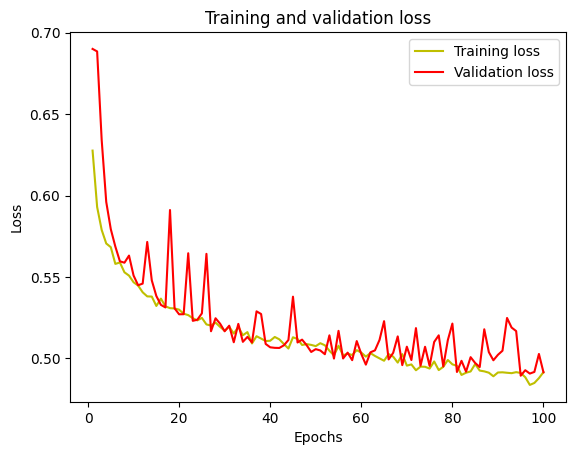

In [48]:
#plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

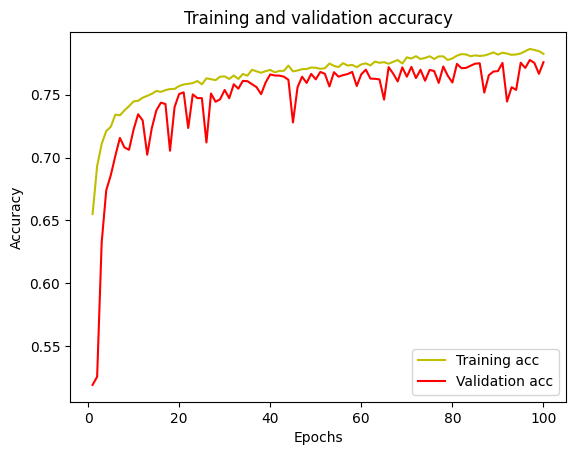

In [49]:
#plot the training and validation accuracy at each epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

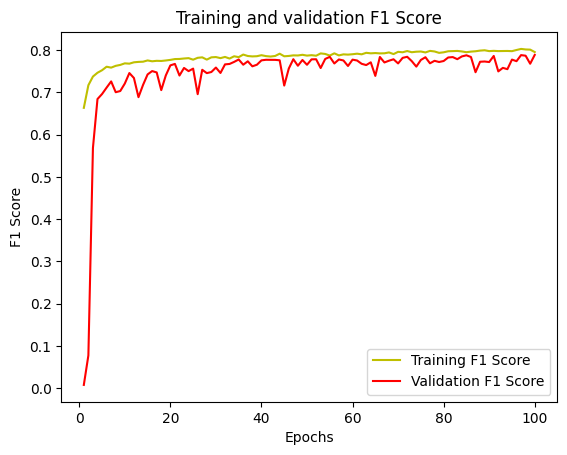

In [50]:
#plot the training and validation F1 Score at each epoch
f1_m = history.history['f1_m']
val_f1_m = history.history['val_f1_m']
plt.plot(epochs, f1_m, 'y', label='Training F1 Score')
plt.plot(epochs, val_f1_m, 'r', label='Validation F1 Score')
plt.title('Training and validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

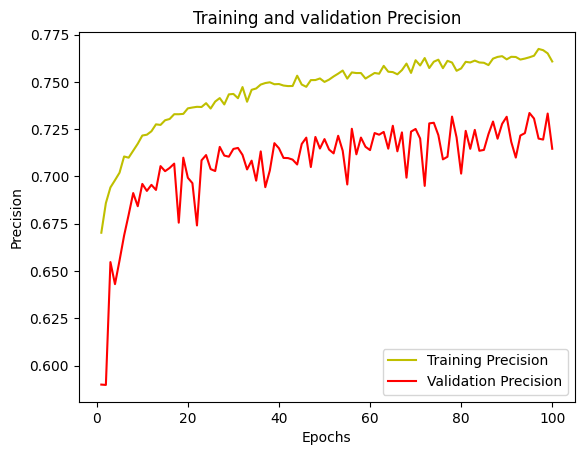

In [51]:
#plot the training and validation precision at each epoch
precision_m = history.history['precision_m']
val_precision_m = history.history['val_precision_m']
plt.plot(epochs, precision_m, 'y', label='Training Precision')
plt.plot(epochs, val_precision_m, 'r', label='Validation Precision')
plt.title('Training and validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

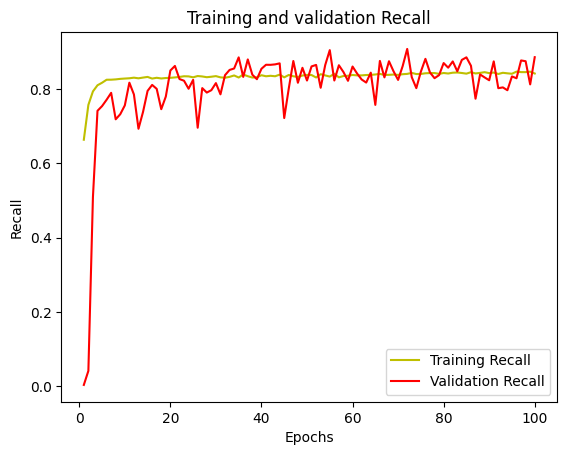

In [52]:
#plot the training and validation recall at each epoch
recall_m = history.history['recall_m']
val_recall_m = history.history['val_recall_m']
plt.plot(epochs, recall_m, 'y', label='Training Recall')
plt.plot(epochs, val_recall_m, 'r', label='Validation Recall')
plt.title('Training and validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [53]:
#Load previously saved model
from keras.models import load_model
model = load_model(r'final year project thesis/trained models/SegNet_9010_13L_sgd_BCE_CP_E100.hdf5', compile=False)

In [54]:
#IOU
y_pred=model.predict(X_test_)
y_pred_thresholded = y_pred > 0.5

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 [==============================] - 15s 3s/step


In [55]:
from tensorflow.keras.metrics import MeanIoU

In [56]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.63288915


(1, 512, 512, 5, 1)
1/1 [==============================] - 0s 155ms/step
(512, 512)


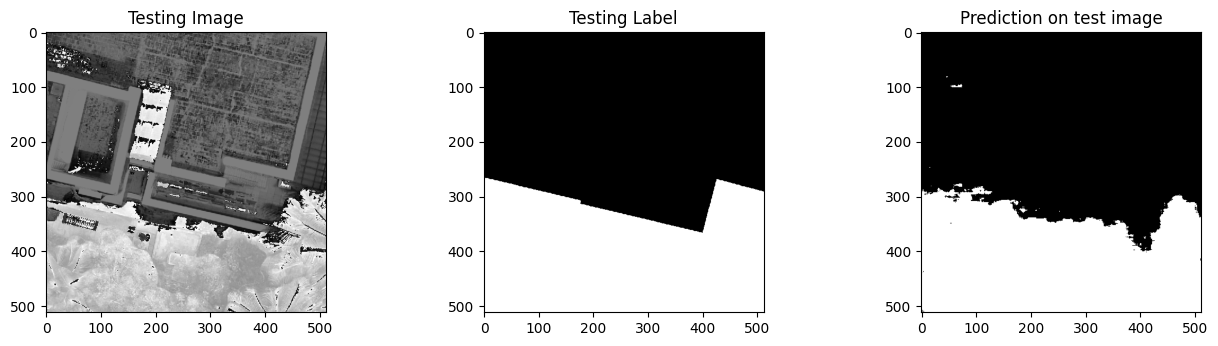

In [99]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test_)-1)
test_img = X_test_[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()